## Use the same blocks for the kawasaki all_nsample1000 test run analysis
---

In [1]:
### Starting here:
from os.path import join, basename, exists
import os
import yaml
import pandas as pd 
import numpy as np
from glob import glob
%load_ext autoreload
%autoreload 2
%matplotlib inline
from src.config import DATA_DIR, PARAMS_DIR, RESULTS, ROOT_DIR
print(DATA_DIR)


#The parameter file depending on the analysis
parameter_f = join(PARAMS_DIR, "kawasaki", "test_run", "kawasaki_snakemake_all_nsample1000.yaml")
# with open(parameter_f,'r') as f:
#     params = yaml.load(f, Loader=yaml.Loader)
with open(parameter_f, 'r') as f:
    params = yaml.safe_load(f)

print(parameter_f)
print(params)

### Make results directory 

results_dir =  join(RESULTS, params["prefix"])
print(results_dir)
if not exists(RESULTS):
    print(f"{RESULTS} is not made yet! Make that first")

else:
    if not exists(results_dir):
        os.makedirs(results_dir)


os.chdir(ROOT_DIR)


Project Directory: /data2/isshamie/time_neutrophils
/data2/isshamie/time_neutrophils/data
/data2/isshamie/time_neutrophils/parameters/kawasaki/test_run/kawasaki_snakemake_all_nsample1000.yaml
{'raw_dir': 'raw/kawasaki/FCS Files/', 'prefix': 'kawasaki/test_run/all_nsample1000', 'tidy_name': 'tidy', 'is_kawa': True, 'wells': None, 'name': {'start': 'Test Run - ', 'end': '.csv'}, 'features': ['Cell Tracker Intensity', 'PI Intensity', 'AnexinV Intensity', 'Cell Aspect Ratio', 'Cell Size', 'Cell Circularity'], 'normalizations': ['log10_z_out3'], 'reduction': 'umap', 'n_subsample': 0.25, 'n_iters': 3, 'min_neighbors': [15, 200, 100], 'min_distances': [0], 'cluster_technique': ['hdb'], 'min_cluster_size': [30, 60], 'min_sample': [100]}
/data2/isshamie/time_neutrophils/data/processed/kawasaki/test_run/all_nsample1000


### Until Here
---
---

In [2]:
from src.plot_umap_embeddings import *


Project Directory: /data2/isshamie/time_neutrophils

Config paths:
__name__ src.params
__package__ src
__file__ /data2/isshamie/time_neutrophils/src/params.py
__cached__ /data2/isshamie/time_neutrophils/src/__pycache__/params.cpython-37.pyc
path /data2/isshamie/time_neutrophils/src/params.py
DATA_DIR /data2/isshamie/time_neutrophils/data
RAW_DIR /data2/isshamie/time_neutrophils/data/raw
PROCESSED /data2/isshamie/time_neutrophils/data/processed
PARAM_DIR /data2/isshamie/time_neutrophils/parameters
RESULTS /data2/isshamie/time_neutrophils/results
FIGURES_DIR /data2/isshamie/time_neutrophils/figures
fig_utils from mplh


In [3]:
from mplh.fig_utils import num_rows_cols

In [4]:
data_f = "data/processed/kawasaki/test_run/all_nsample1000/transform/data_df_log10_z.p"
meta_f = "data/processed/kawasaki/test_run/all_nsample1000/tidy/meta.tsv"
umap_f = "results/kawasaki/test_run/all_nsample1000/log10_z/umap_out/200_0.0/embedding_0.p"

fig_dir = "figures/kawasaki/test_run/all_nsample1000/log10_z/umap_out/200_0.0/sim0"
min_neighbor = 200 
min_distance = 0.0
data, meta = load_data(data_f, meta_f)

# plot_embedding_features(data, meta, umap_f, fig_dir,
#                     min_neighbor=min_neighbor, min_distance=min_distance, labels_f=cluster_f, labels_to_keep=labels_to_keep)

In [5]:
#ls figures/{params["prefix"]}/TP4/
suf = "TP4"
trans = "log10_z"
clust = "umap_out"
clust_params = "200_0.0"

outdir = join(FIGURES_DIR, params["prefix"], trans, clust, clust_params, suf)
if not os.path.exists(outdir):
    os.mkdir(outdir)
#os.makedirs()

In [6]:
curr_df = subset_on_clusters(data, meta, umap_f, labels_f=None, labels_to_keep=None)
curr_df["Well"] = curr_df.apply(lambda x: str(x["Stimuli"])+"_"+ str(x["Sample"]), axis=1)

curr_df.head()


,Sample,Timepoint,Stimuli,Field Number,embedding_1,embedding_2,Cell Size,Cell Circularity,Cell Aspect Ratio,Cell Tracker Intensity,PI Intensity,AnexinV Intensity,Well
44_1_A_1,1,1,A,1,0.783424,-3.569883,0.523367,0.085116,0.541895,-0.139025,-0.815146,-0.726578,A_1
13110_1_A_1,1,1,A,3,-2.179268,-9.445706,-0.376418,0.337075,-0.350778,1.983337,-0.856039,-0.838251,A_1
13024_1_A_1,1,1,A,3,3.586998,-1.935851,0.720860,0.133902,-0.390586,-0.974614,-0.806235,-0.773418,A_1
12964_1_A_1,1,1,A,3,3.429667,-1.798119,1.131338,0.244436,-0.652947,-0.813034,-0.820870,-0.770388,A_1
13182_1_A_1,1,1,A,3,3.242953,-1.063187,1.038405,0.198920,-0.381485,-1.770165,-0.913601,-0.932021,A_1


In [7]:
samples = subsamp(curr_df, meta=None,n_subsample=0.05)
samples.head()

0.05 fraction


,Sample,Timepoint,Stimuli,Field Number,embedding_1,embedding_2,Cell Size,Cell Circularity,Cell Aspect Ratio,Cell Tracker Intensity,PI Intensity,AnexinV Intensity,Well
index,,,,,,,,,,,,,
331_1_A_1,1,1,A,1,3.620114,-2.776256,0.830993,0.231498,-0.790279,-0.482777,-0.894144,-0.903300,A_1
8334_1_A_1,1,1,A,2,1.466167,-1.710259,0.889037,-0.075269,0.495317,-1.033290,-0.816876,-0.766858,A_1
13139_1_A_1,1,1,A,3,2.832181,-1.460580,1.342649,0.234554,-0.127123,-1.018271,-0.897065,-0.904286,A_1
30_1_A_1,1,1,A,1,2.925892,-1.930438,0.725291,0.215437,-0.056283,-0.946173,-0.830059,-0.722753,A_1
218_1_A_1,1,1,A,1,2.658618,-1.442829,1.228348,0.262178,-0.028435,-1.060731,-0.811910,-0.754449,A_1


### Wells to look at

In [8]:
wells = [
 "A_1",
 "A_2",
 "A_4",
 "B_1",
 "B_2",
 "B_4",
 "A_7"]

### remove the outliers found in embedding 1 by removing cells with the value greater than 10 in the variable curr_df_em1

In [9]:
curr_df_em1 = curr_df[curr_df["embedding_1"]<10]

## Timepoint 4h

In [10]:
tp4 = curr_df_em1[curr_df_em1["Timepoint"].isin([4])]

# Figures

## Look at timepoint 4h,  Distribution of cells 


3 3


Text(0.5, 0.98, 'Distributions at time point=4hours')

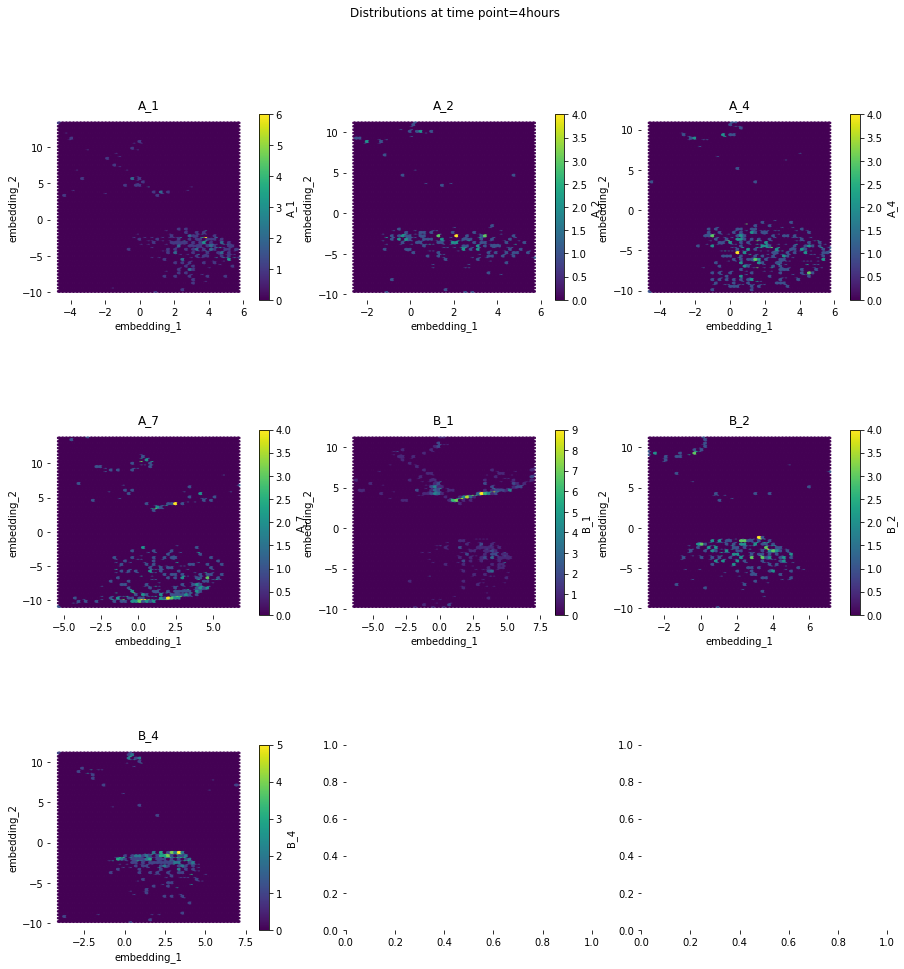

In [21]:
run_plot_hex(tp4, col="Well", vals=wells,
             show_cbar=True, outdir=outdir)
plt.suptitle("Distributions at time point=4hours")

## Look at timepoint 4, breakup by well and plot feature values

3 3
3 3
3 3
3 3
3 3
3 3


<Figure size 432x288 with 0 Axes>

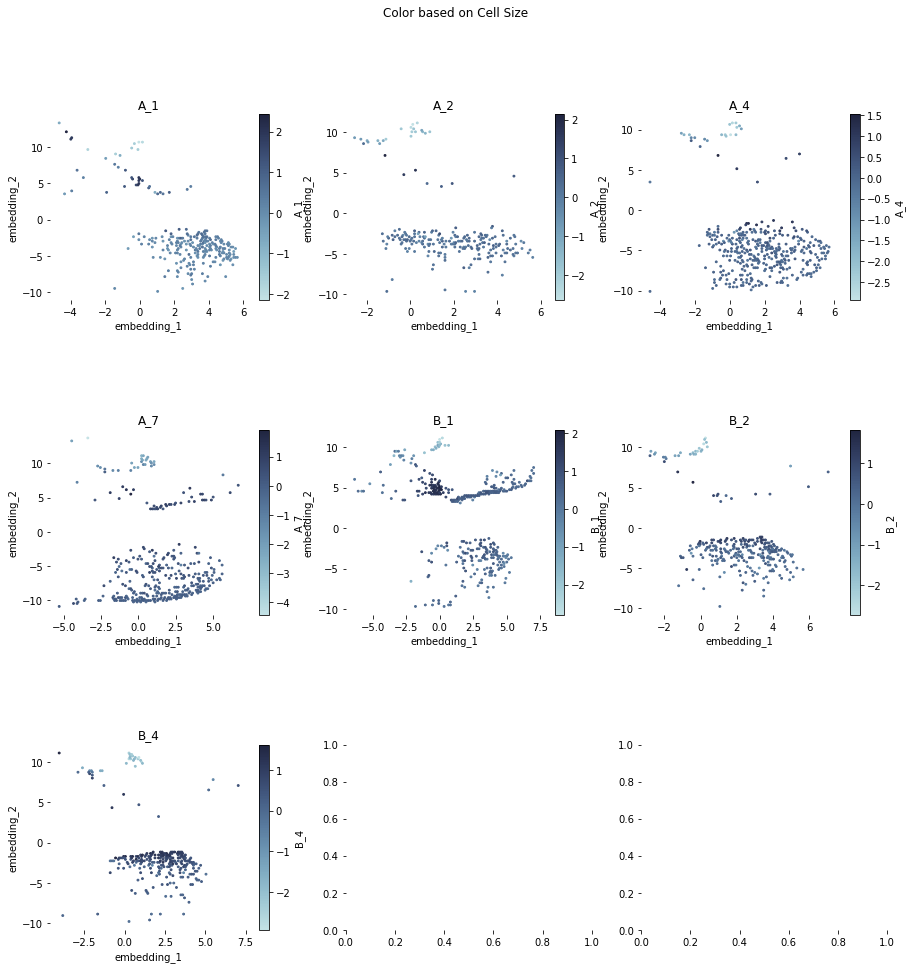

<Figure size 432x288 with 0 Axes>

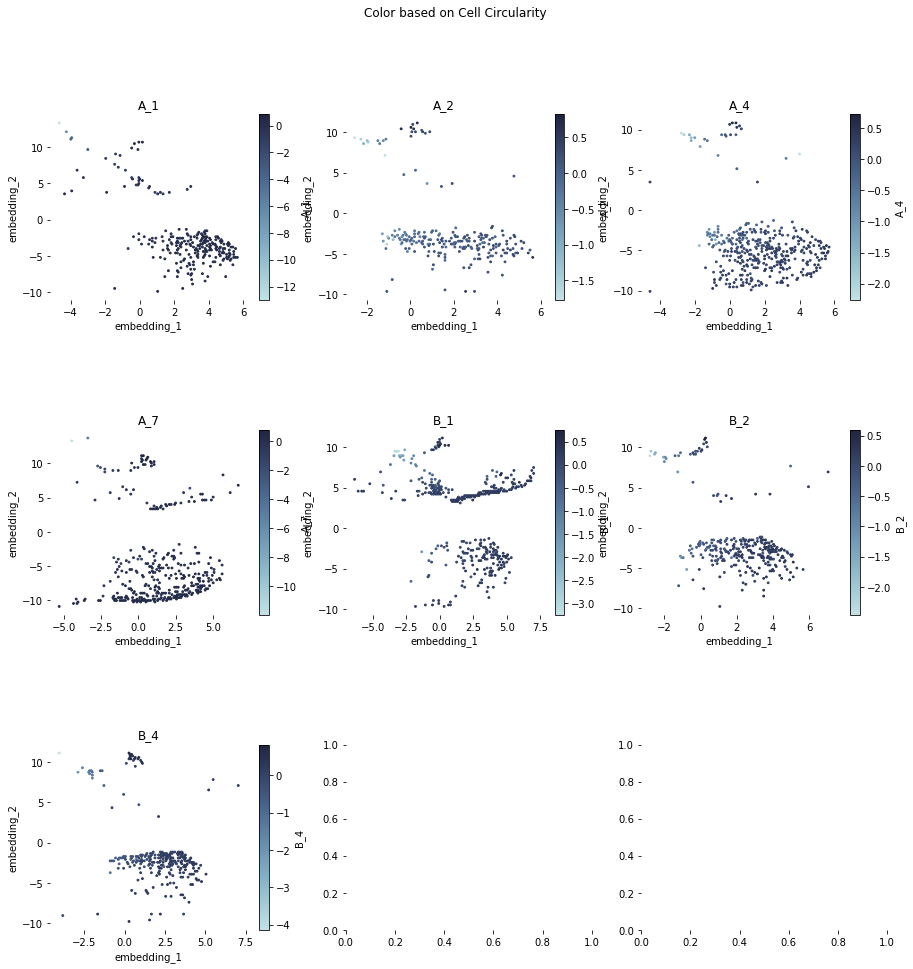

<Figure size 432x288 with 0 Axes>

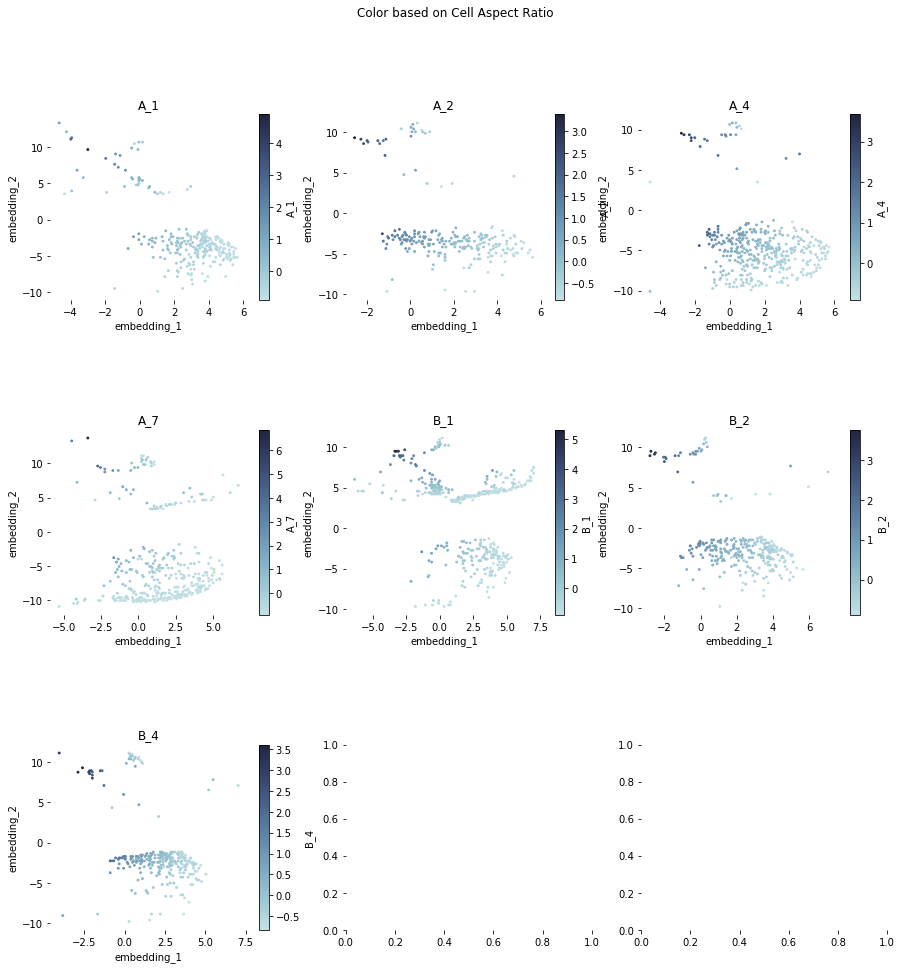

<Figure size 432x288 with 0 Axes>

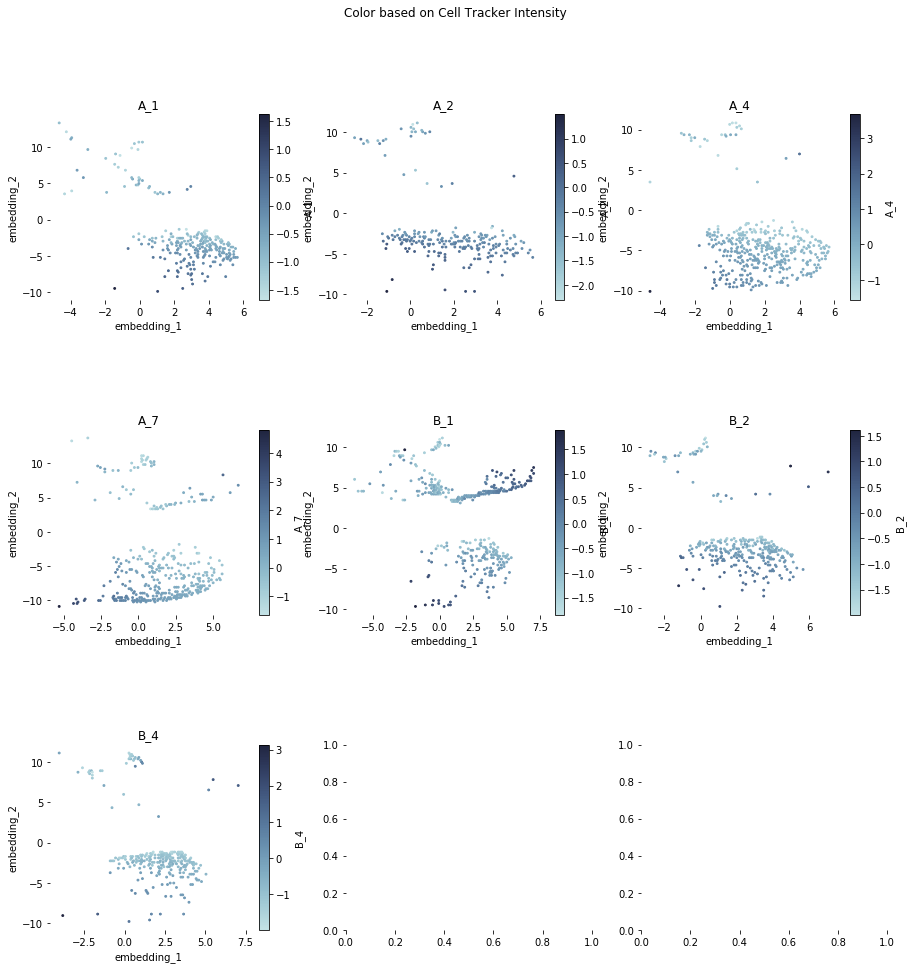

<Figure size 432x288 with 0 Axes>

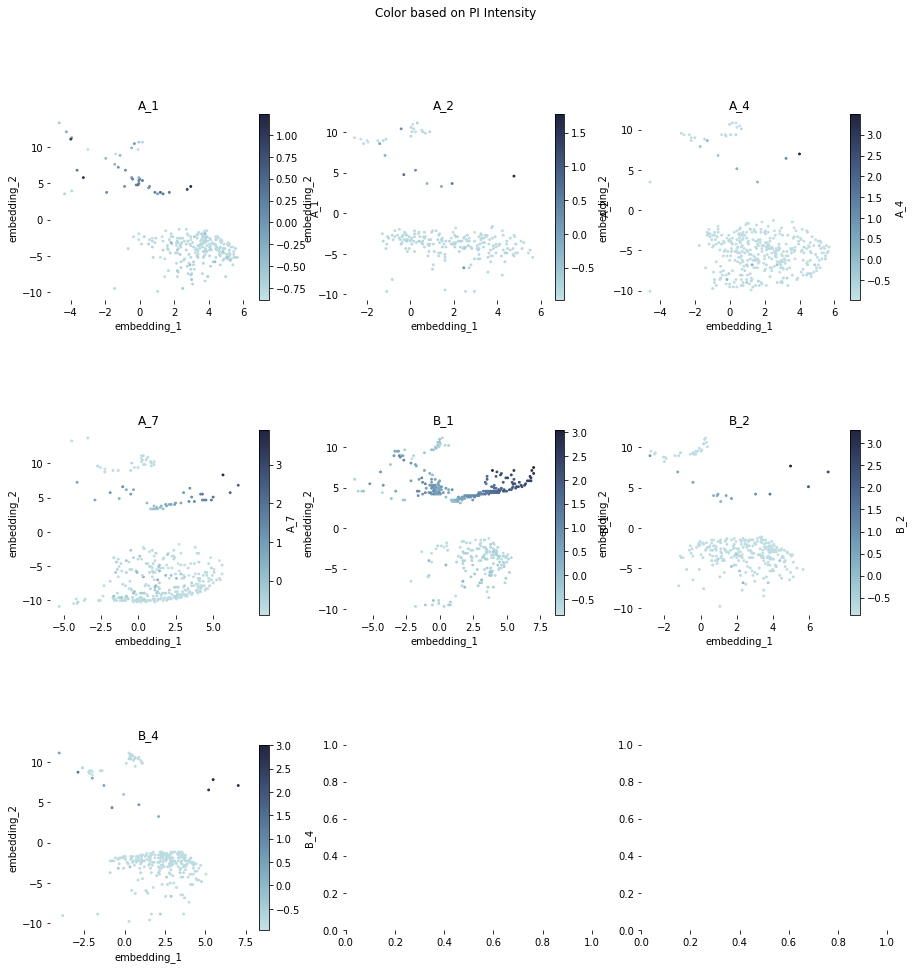

<Figure size 432x288 with 0 Axes>

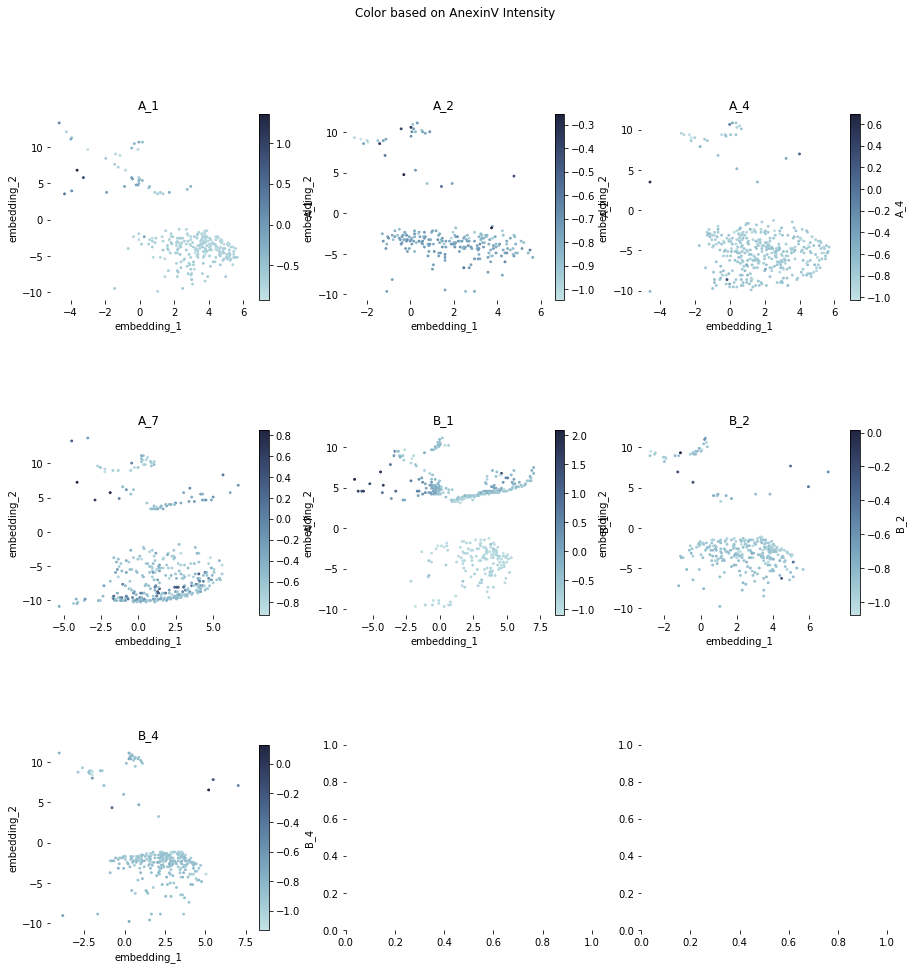

In [22]:
#wells = ["A_1", "B_1"] #, "A_2"]
for i in data.columns:#tp4[tp4["Timepoint"].isin([4])].columns.values:
    f = plt.figure()    
    #plt.close()    
    run_plot_hex_tp(tp4, col="Well", vals=wells,
                 show_cbar=True, outdir=outdir, color_col=i,share=False )

## Plot UMAP embeddings colored by timepoints

3 2


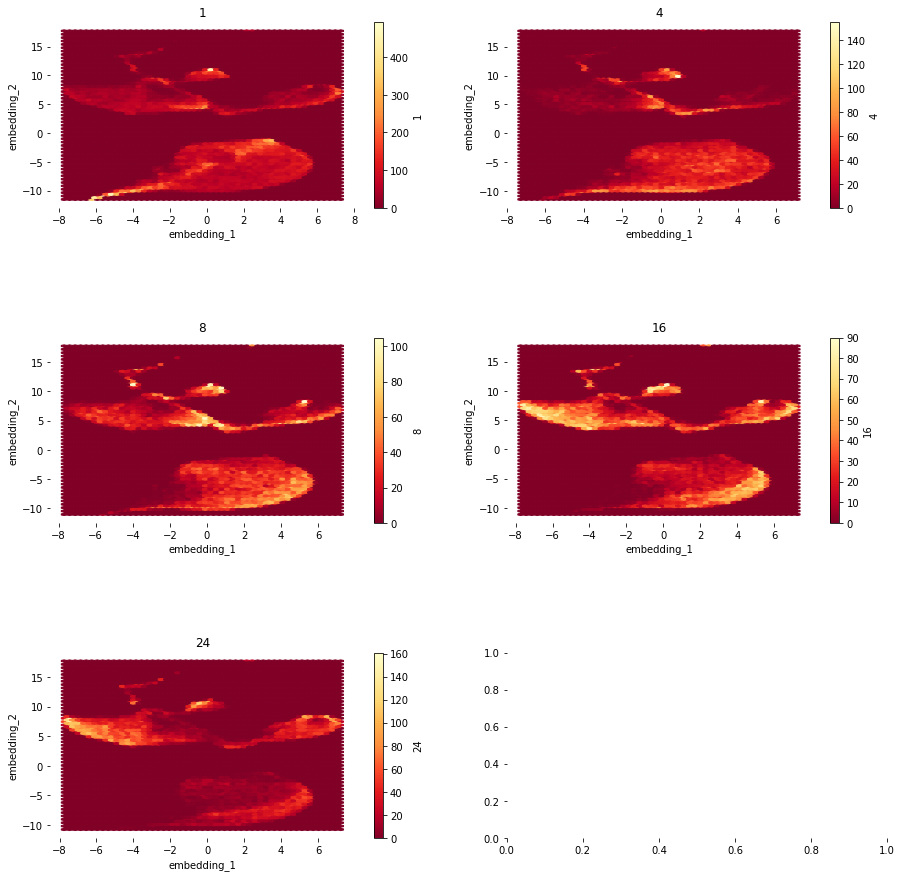

In [13]:
col = 'Timepoint'
vals=[1,4,8,16,24]
run_plot_hex(curr_df_em1, col=col, vals=vals, show_cbar=True, outdir=outdir)

## Timepoint 4

In [17]:
import matplotlib as mpl

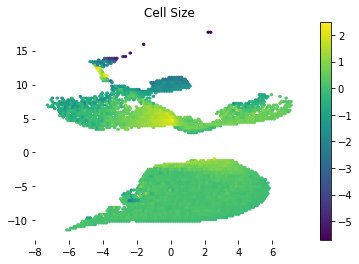

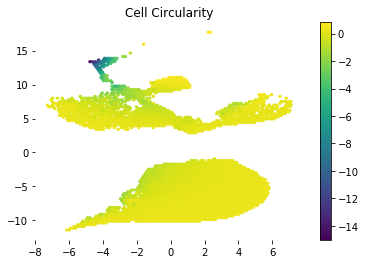

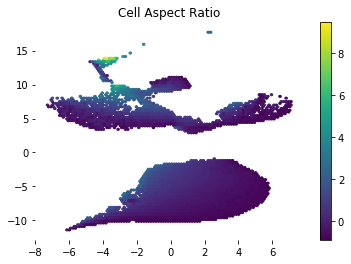

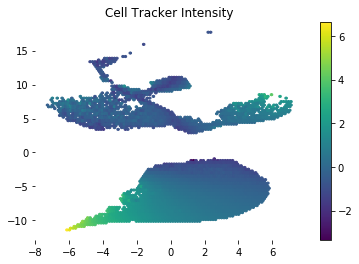

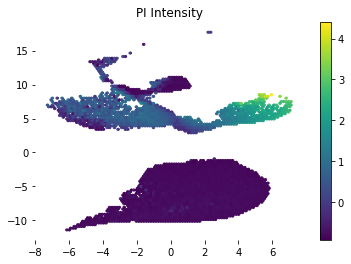

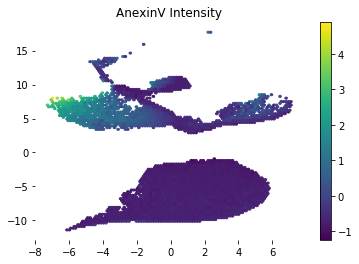

In [14]:
for i in data.columns:#tp4[tp4["Timepoint"].isin([4])].columns.values:
    f = plt.figure()
    hb = plt.hexbin(x=tp4["embedding_1"].values, y=tp4["embedding_2"].values,
                                   C=tp4[i].values.astype(float),
                                   reduce_C_function=np.median)
    cb = f.colorbar(hb, ax=plt.gca())
    plt.title(i)
    
    helper_save(join(outdir, i))
    #plt.close()        